<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Effective-connectivity-/-Causal-models" data-toc-modified-id="Effective-connectivity-/-Causal-models-1">Effective connectivity / Causal models</a></span><ul class="toc-item"><li><span><a href="#Randomization" data-toc-modified-id="Randomization-1.1">Randomization</a></span></li><li><span><a href="#Granger-causality-(GM)" data-toc-modified-id="Granger-causality-(GM)-1.2">Granger causality (GM)</a></span></li><li><span><a href="#Psychophysiological-interactions-(PPI)" data-toc-modified-id="Psychophysiological-interactions-(PPI)-1.3">Psychophysiological interactions (PPI)</a></span></li><li><span><a href="#Structural-equation-modeling-(SEM)" data-toc-modified-id="Structural-equation-modeling-(SEM)-1.4">Structural equation modeling (SEM)</a></span></li><li><span><a href="#Dynamic-causal-modeling-(DCM)" data-toc-modified-id="Dynamic-causal-modeling-(DCM)-1.5">Dynamic causal modeling (DCM)</a></span></li><li><span><a href="#Upsides" data-toc-modified-id="Upsides-1.6">Upsides</a></span></li><li><span><a href="#Downsides" data-toc-modified-id="Downsides-1.7">Downsides</a></span></li><li><span><a href="#Example-applications" data-toc-modified-id="Example-applications-1.8">Example applications</a></span></li><li><span><a href="#Relevance-to-other-analysis-techniques" data-toc-modified-id="Relevance-to-other-analysis-techniques-1.9">Relevance to other analysis techniques</a></span></li></ul></li><li><span><a href="#Relevant-resources/publications" data-toc-modified-id="Relevant-resources/publications-2">Relevant resources/publications</a></span></li><li><span><a href="#Simulation:-Granger-causality" data-toc-modified-id="Simulation:-Granger-causality-3">Simulation: Granger causality</a></span></li></ul></div>

# Effective connectivity / Causal models
Description

## Randomization
The best way to study causal effects is to randomly sample participants into multiple groups, where one group experiences whatever is hypothesized to cause an effect and another group acts as a control group. You can then test if the effect occurs more frequently in the experimental group vs. the control group. Unfortunately, it is not always feasible to study causal effects in this manner. This is because if you, for instance, want to test if smoking causes lung cancer, it would be unethical to force a random sample of participants to smoke if they would otherwise not be smokers. Alternatively, perhaps your hypothesis is that the fusiform face area is causally responsible for face perception. It may be difficult or dangerous to lesion the fusiform face area of participants to test this hypothesis (note: researchers can get around such limitations by studying non-human animals or studying humans who coincidentally have electrodes in certain brain regions as a result of seizure treatment). 

Note that all the below other techniques for studying causal effects have important limitations because they attempt to quantify causality using solely observational data. Conclusions based on the below techniques are susceptible to confounding variables; the assumptions that need to be made with the below methods (e.g., that their set of competing models is complete, or that all possible confounds or mediating variables have been accounted for) make the subsequent conclusions sometimes difficult to interpret. To fully account for these confounds would theoretically require comparison of an infinite set of causal models that take into account all unobserved variables.

## Granger causality (GM)
Granger causality views causal effects in terms of whether past information from A can help predict current information about B. For example, imagine your ability to predict activation in parietal cortex is good if you use the participant's parietal activation from the past ten seconds to train your model. If you also include activation from the participant's visual cortex activation from the last ten seconds and the model performs even better, then it can be said that the visual cortex is granger causing parietal cortex activation. Note that "granger causing" is not the same as a "cause". "Cause" implies that the causal brain region is directly inducing activation of the other brain region whereas "granger cause" refers to the lagged activations of one brain region improving a model of another brain region. 

## Psychophysiological interactions (PPI)
Basically just adding a task-dependent regressor to a general linear model, looking at "causal" effect in terms of how data looks different dependent on the change in task demands. 

## Structural equation modeling (SEM)
Similar to a general linear model but instead of minimizing error between the observed variables and predictors, maximum likelihood estimation (MLE) is used to estimate parameters for typically more complex relationships of the statistical model (e.g., latent variables, mediation, causal relationships). Only the variance-covariance matrix of the variables is used for MLE, such that SEM involves specifying various possible graphical structures between variables and seeing which structure yields a variance-covariance matrix that is most similar to the actual matrix (i.e., comparing log-likelihoods between models). 

## Dynamic causal modeling (DCM)
Bayesian model comparison of competing encoding models where the parameters differ in terms of which brain regions are causing subsequent changes to the activations of other brain regions. Here "best" is in terms of being able to most accurately simulate the observed time-series of neural activity. The properties of the best fitting model are then suggested as being accurate latent properties of reality. DCM may be preferred over the other methods because it uses probabilistic (rather than deterministic) graphical models and does not assume that random fluctuations over time are uncorrelated. However, as with all of these methods (aside from randomization), an important downfall is that it can be impossible to determine all the possible underlying influences that may be latently responsible for downstream effects.

## Upsides

lorem

## Downsides
lorem

## Example applications
lorem

## Relevance to other analysis techniques
lorem

# Relevant resources/publications

* [Buchel & Friston (1997): Effective connectivity and neuroimaging](https://www.fil.ion.ucl.ac.uk/spm/doc/books/hbf1/Ch6.pdf)
* [Mehler & Kording (2018): The lure of misleading causal statements in functional connectivity research](https://arxiv.org/abs/1812.03363)
* [Adhikary (2020): Testing for Granger Causality Using Python](https://rishi-a.github.io/2020/05/25/granger-causality.html)

# Simulation: Granger causality
First import the data and a few standard Python packages.

In [3]:
# general packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

# pull data from GitHub
import requests, io
for array in ['time_series1','time_series2']:
    globals()['{}'.format(array)] = np.load(io.BytesIO(requests.get(
        'http://github.com/PaulScotti/fmriplayground/raw/main/methods/causal_modeling/{}.npy?raw=true'.format(array)).content),allow_pickle=True)
    
# change default plotting
plt.rcParams.update({'font.size': 20, 'figure.figsize': (7,2)})

# overview of the data
num_subjects = time_series1.shape[0]
num_TRs = time_series1.shape[1]
num_conditions = 2

In this simulated dataset we have 20 subjects. Each subject has a BOLD signal time series for two brain regions (ROI A and ROI B) which represents the brain activations for each subject watching a movie. Our goal is to see if ROI B granger causes ROI A. First let's plot the time series of each brain region for one subject, where the x-axis here represents the repetition time (TR) of the scanner (MRI scanners only collect data every x seconds, where x is the repetition time).

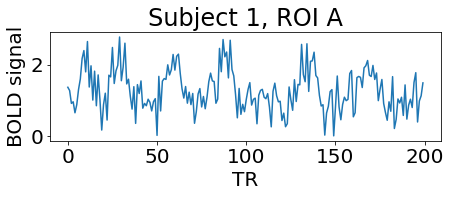

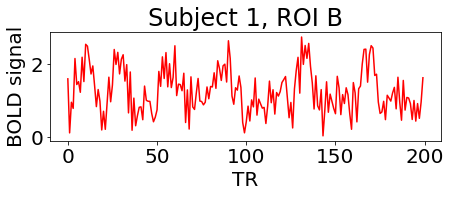

In [224]:
sub = 0
plt.plot(time_series1[sub,:])
plt.title("Subject 1, ROI A")
plt.ylabel("BOLD signal")
plt.xlabel("TR")
plt.show()
plt.plot(time_series2[sub,:],c='red')
plt.title("Subject 1, ROI B")
plt.ylabel("BOLD signal")
plt.xlabel("TR")
plt.show()

If ROI B granger causes ROI A, then that means that you can use past activity from ROI B to help predict the current activity from ROI A. In other words, we will first see how well we can predict ROI A BOLD signal using past TRs from ROI A. We will then also add in past TRs from ROI B into the model and see if the model significantly improves across subjects. The easiest way to use previous TRs to fit a model on current TRs is to use the lagged time series as the dependent variable (by simply shifting it backwards along the x-axis).

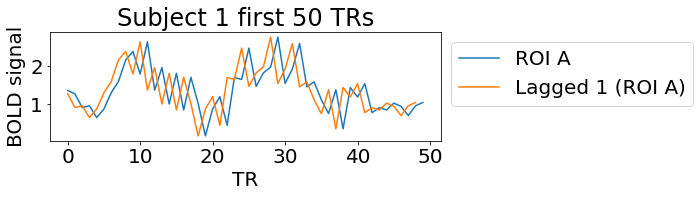

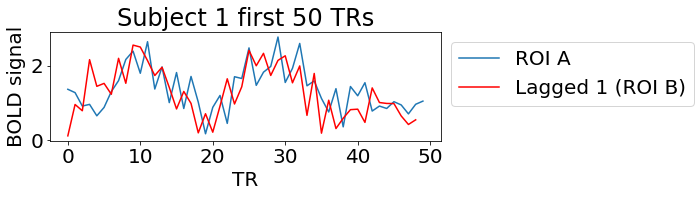

In [211]:
time_series1_lag1 = np.roll(time_series1,-1)
time_series1_lag1[:,-1] = np.zeros(num_subjects)

time_series2_lag1 = np.roll(time_series2,-1)
time_series2_lag1[:,-1] = np.zeros(num_subjects)

plt.plot(time_series1[sub,:50],label='ROI A')
plt.plot(time_series1_lag1[sub,:49],label='Lagged 1 (ROI A)')
plt.title("Subject 1 first 50 TRs")
plt.ylabel("BOLD signal")
plt.xlabel("TR")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

plt.plot(time_series1[sub,:50],label='ROI A')
plt.plot(time_series2_lag1[sub,:49],c='red',label='Lagged 1 (ROI B)')
plt.title("Subject 1 first 50 TRs")
plt.ylabel("BOLD signal")
plt.xlabel("TR")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

So to put it in other words, we will use the orange and red lines above to help fit a model on the blue line. If the orange line and red line together improve the model fit more than the orange line alone, then we can establish granger causality for ROI B on ROI A. Here we are just using a single lag with simple linear regression, but in practice one would likely try multiple different lags and also do some additional processing and statistical tests to fully establish granger causality (see resources at the bottom).

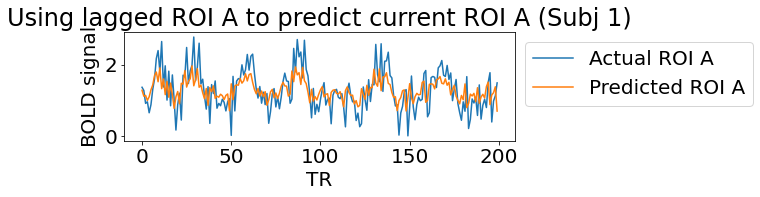

R squared = 0.2139984811422989


In [229]:
model1 = LinearRegression().fit(time_series1_lag1[sub,:][:,None],
                               time_series1[sub,:][:,None])
plt.plot(time_series1[sub,:][:,None],label="Actual ROI A")
plt.plot(model1.predict(time_series1_lag1[sub,:][:,None]),label="Predicted ROI A")
plt.ylabel("BOLD signal")
plt.xlabel("TR")
plt.title("Using lagged ROI A to predict current ROI A (Subj 1)")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

print("R squared = {}".format(model1.score(time_series1_lag1[sub,:][:,None],
            time_series1[sub,:][:,None])))

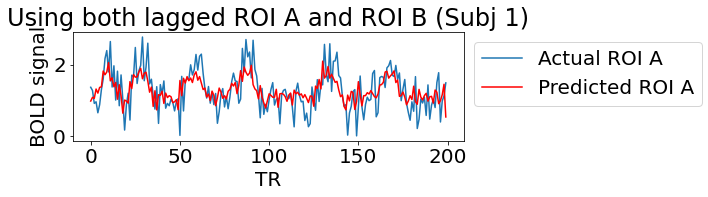

R squared = 0.2741055103284412


In [231]:
model2 = LinearRegression().fit(np.array([time_series1_lag1[sub,:],time_series2_lag1[sub,:]]).T,
                               time_series1[sub,:][:,None])
plt.plot(time_series1[sub,:][:,None],label="Actual ROI A")
plt.plot(model2.predict(np.array([time_series1_lag1[sub,:],time_series2_lag1[sub,:]]).T),c='r',label="Predicted ROI A")
plt.ylabel("BOLD signal")
plt.xlabel("TR")
plt.title("Using both lagged ROI A and ROI B (Subj 1)")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

print("R squared = {}".format(model2.score(np.array([time_series1_lag1[sub,:],time_series2_lag1[sub,:]]).T,
            time_series1[sub,:][:,None])))

For subject 1, we observe that a linear model using the lagged time series of ROI A could explain 21.4% of the variance for ROI A. However, a model with both the lagged ROI A and lagged ROI B as features of the model could explain 27.4% of the variance for ROI A. Let's see if this generalizes across all the subjects in our dataset.

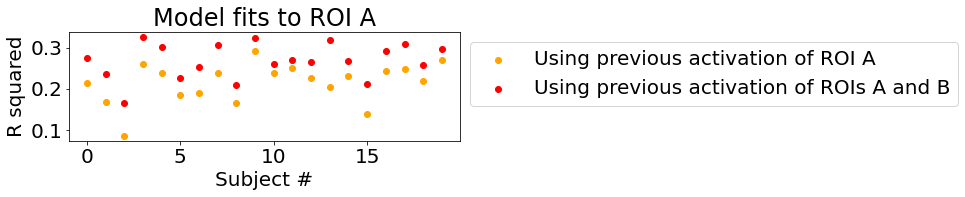

Significantly better model fits? (t-test):
t=-10.3033, p=0.0000


In [232]:
model1_R2s = [];
model2_R2s = [];
for sub in range(num_subjects):
    model1 = LinearRegression().fit(time_series1_lag1[sub,:][:,None],
                               time_series1[sub,:][:,None])

    model2 = LinearRegression().fit(np.array([time_series1_lag1[sub,:],time_series2_lag1[sub,:]]).T,
                               time_series1[sub,:][:,None])

    model1_R2s = np.concatenate([model1_R2s,
                                    [model1.score(time_series1_lag1[sub,:][:,None],
                                    time_series1[sub,:][:,None])]])
    
    model2_R2s = np.concatenate([model2_R2s,
                                    [model2.score(np.array([time_series1_lag1[sub,:],
                                                           time_series2_lag1[sub,:]]).T,
                                    time_series1[sub,:][:,None])]])
    
plt.scatter(np.arange(num_subjects),model1_R2s,c='orange',label="Using previous activation of ROI A")
plt.scatter(np.arange(num_subjects),model2_R2s,c='r',label="Using previous activation of ROIs A and B")
plt.title("Model fits to ROI A")
plt.ylabel("R squared")
plt.xlabel("Subject #")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

stat = stats.ttest_rel(model1_R2s,model2_R2s)
print("Significantly better model fits? (t-test):\nt={:.4f}, p={:.4f}".format(stat.statistic,stat.pvalue))

So it seems that ROI B granger causes ROI A. However, be careful when establishing causality from observational data. Granger causality cannot be interpreted the same as causal effects from randomized trials. For instance, perhaps there is an ROI C that is responsible for the shared information in ROI A and B. Or perhaps such effects could be explained in terms of brain regions having a different hemodynamic response function time courses. 

In [14]:
## Code used to simulate the data instead of loading it from GitHub: ##
import numpy as np
from scipy.stats import gamma
from scipy import signal
np.random.seed(1)
num_subjects = 20
num_TRs = 200

# trying to copy SPM canonical hrf with max value at 1
hrf_function = (gamma.pdf(np.arange(20),5) - 0.2 * gamma.pdf(np.arange(20),12)) / .2

def blocks(points,length=200):
    x = np.arange(length) # number of points on x axis
    y = np.zeros(length) # time series
    for p in points:
        y[p] = 1
    return y

block1 = blocks([np.arange(10)+2,np.arange(10)+20,np.arange(10)+50,np.arange(10)+80,
                 np.arange(10)+125,np.arange(10)+160])
block1_conv = (signal.convolve(block1, hrf_function, mode='full'))[:num_TRs]
block1_conv /= np.max(block1_conv)

time_series1=np.full((num_subjects,num_TRs),np.nan)
time_series2=np.full((num_subjects,num_TRs),np.nan)
for sub in range(num_subjects):
    time_series1[sub,:] = block1_conv+np.random.random(num_TRs)+np.random.random(num_TRs)
    time_series2[sub,:] = block1_conv+np.random.random(num_TRs)+np.random.random(num_TRs)
    time_series2[sub,:] = np.roll(time_series2[sub,:],-1)

np.save('time_series1.npy',time_series1)
np.save('time_series2.npy',time_series2)